# Chapter 1 Financial Time Series and Their Characteristics

In [61]:
import numpy as np 
import pandas as pd 
import statsmodels as sm 
import matplotlib.pyplot as plt 
from scipy import stats

In [3]:
# da = pd.read_table(r'data\d-ibm3dx7008.txt', sep=r"\s+", header=0)
da = pd.read_csv(r'data\d-ibm3dx7008.txt', sep=r"[\f\n\r\t\v]", header=0, engine='python')

In [4]:
da.head()

,Date,rtn,vwretd,ewretd,sprtrn
0,19700102,0.000686,0.012137,0.033450,0.010211
1,19700105,0.009596,0.006375,0.018947,0.004946
2,19700106,0.000679,-0.007233,-0.005776,-0.006848
3,19700107,0.000678,-0.001272,0.003559,-0.002047
4,19700108,0.002034,0.000564,0.002890,0.000540


In [5]:
da = pd.read_table(r'data\d-ibm3dx7008.txt', sep=r"\s+", header=0)

In [6]:
da.head()

,Date,rtn,vwretd,ewretd,sprtrn
0,19700102,0.000686,0.012137,0.033450,0.010211
1,19700105,0.009596,0.006375,0.018947,0.004946
2,19700106,0.000679,-0.007233,-0.005776,-0.006848
3,19700107,0.000678,-0.001272,0.003559,-0.002047
4,19700108,0.002034,0.000564,0.002890,0.000540


In [7]:
da.size

49225

In [8]:
da.iloc[:, 0:1]

,Date
0,19700102
1,19700105
2,19700106
3,19700107
4,19700108
...,...
9840,20081224
9841,20081226
9842,20081229
9843,20081230


In [9]:
ibm = da.iloc[:, 1:2]
ibm

,rtn
0,0.000686
1,0.009596
2,0.000679
3,0.000678
4,0.002034
...,...
9840,-0.000993
9841,0.010060
9842,-0.000984
9843,0.028308


In [10]:
ibm = ibm * 100
ibm.describe()

,rtn
count,9845.000000
mean,0.040161
std,1.692544
min,-22.963000
25%,-0.857100
50%,0.000000
75%,0.883300
max,13.163600


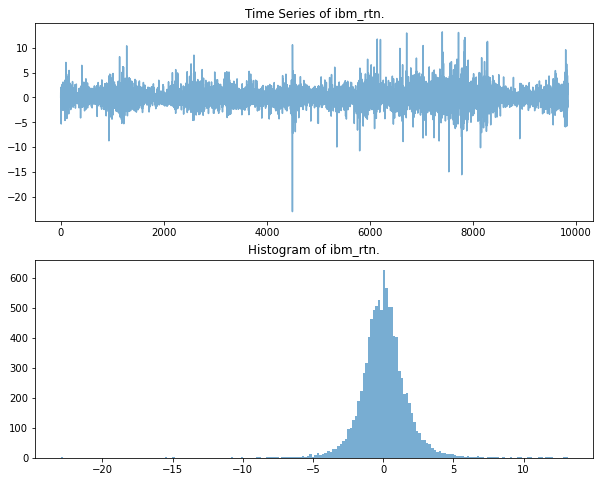

In [11]:
ibm_rtn = np.array(ibm)
fig, axes = plt.subplots(2, 1, figsize=(10,8))
axes[0].plot(ibm_rtn, alpha=0.6)
axes[0].set(title='Time Series of ibm_rtn.')
axes[1].hist(ibm_rtn, alpha=0.6, bins=200)
axes[1].set(title='Histogram of ibm_rtn.')
plt.show()

In [12]:
def normtest(data):
    skew = data.skew()[0]
    t_skew = skew / np.sqrt(6/len(data))
    p_skew = sc.norm.sf(abs(t_skew)) * 2

    kurt = data.kurt()[0]
    t_kurt = kurt / np.sqrt(24/len(data))
    p_kurt = sc.norm.sf(abs(t_kurt)) * 2

    JBtest = (skew**2 / 6 + kurt**2 /24) * len(data)
    p_JBtest = sc.chi2.sf(JBtest, 2)

    result = pd.DataFrame({'Skewness': skew, 'P-Skew': p_skew, 'Kurtosis': kurt, 'P-Kurt': p_kurt, 'JBtest': JBtest, 'P-JBtest': p_JBtest}, index=['value'])

    return result

result = normtest(ibm)
result

,Skewness,P-Skew,Kurtosis,P-Kurt,JBtest,P-JBtest
value,0.061417,0.012852,9.924633,0.0,40411.028886,0.0


In [66]:
libm = np.log(da["rtn"] + 1) * 100
libm

0       0.068576
1       0.955025
2       0.067877
3       0.067777
4       0.203193
          ...   
9840   -0.099349
9841    1.000974
9842   -0.098448
9843    2.791473
9844    0.727448
Name: rtn, Length: 9845, dtype: float64

In [33]:
libm.describe()

count    9845.000000
mean        0.025825
std         1.693988
min       -26.088436
25%        -0.860794
50%         0.000000
75%         0.879422
max        12.366437
Name: rtn, dtype: float64

In [68]:
# student't-Test
tstatics, pval = stats.ttest_1samp(libm, 0)
print(f"tStatics = {tstatics:.10f}\nP-Value = {pval:.10f}")
if pval > 0.05:
    print("Cann't reject the NULL hypothesis at the 5% significance level.")
else:
    print("Reject the NULL hypothesis at the 5% significance level.")

tStatics = 1.5126207896
P-Value = 0.1304081119
Cann't reject the NULL hypothesis at the 5% significance level.


In [78]:
chiStatics, pval, *_ = sm.stats.stattools.jarque_bera(libm)
print(f"chiStatics = {chiStatics:.10f}\nP-Value = {pval:.10f}")
if pval > 0.05:
    print("Cann't reject the NULL hypothesis at the 5% significance level.")
else:
    print("Reject the NULL hypothesis at the 5% significance level.")

chiStatics = 60921.9342659445
P-Value = 0.0000000000
Reject the NULL hypothesis at the 5% significance level.
